<a href="https://colab.research.google.com/github/CakeNuthep/Sudoku_OCR/blob/main/Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/CakeNuthep/Sudoku.git

Cloning into 'Sudoku'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 12 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 40.91 KiB | 3.15 MiB/s, done.


In [3]:
!cd /content/Sudoku/

In [29]:
!pip install py-sudoku

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Train

In [15]:
from Sudoku_OCR.pyimagesearch.models import Sudokunet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import argparse

# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-m", "--model", required=True,
# 	help="path to output model after training")
# args = vars(ap.parse_args())

# initialize the initial learning rate, number of epochs to train
# for, and batch size
INIT_LR = 1e-3
EPOCHS = 10
BS = 128

# grab the MNIST dataset
print("[INFO] accessing MNIST...")
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

# add a channel (i.e., grayscale) dimension to the digits
trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
testData = testData.reshape((testData.shape[0], 28, 28, 1))

# scale data to the range of [0, 1]
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

# convert the labels from integers to vectors
le = LabelBinarizer()
trainLabels = le.fit_transform(trainLabels)
testLabels = le.transform(testLabels)

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR)
model = Sudokunet.SudokuNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(
	trainData, trainLabels,
	validation_data=(testData, testLabels),
	batch_size=BS,
	epochs=EPOCHS,
	verbose=1)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testData)
print(classification_report(
	testLabels.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in le.classes_]))

# serialize the model to disk
print("[INFO] serializing digit model...")
model.save("/content/Sudoku_OCR/pyimagesearch/models/chk.h5", save_format="h5")

[INFO] accessing MNIST...


[INFO] compiling model...
[INFO] training network...
Epoch 1/10
469/469 [==============================] - 77s 160ms/step - loss: 0.7478 - accuracy: 0.7507 - val_loss: 0.1250 - val_accuracy: 0.9641
Epoch 2/10
469/469 [==============================] - 76s 161ms/step - loss: 0.2898 - accuracy: 0.9146 - val_loss: 0.0630 - val_accuracy: 0.9814
Epoch 3/10
469/469 [==============================] - 74s 158ms/step - loss: 0.2209 - accuracy: 0.9348 - val_loss: 0.0558 - val_accuracy: 0.9831
Epoch 4/10
469/469 [==============================] - 75s 160ms/step - loss: 0.1867 - accuracy: 0.9451 - val_loss: 0.0465 - val_accuracy: 0.9869
Epoch 5/10
469/469 [==============================] - 72s 154ms/step - loss: 0.1616 - accuracy: 0.9532 - val_loss: 0.0471 - val_accuracy: 0.9870
Epoch 6/10
469/469 [==============================] - 75s 160ms/step - loss: 0.1516 - accuracy: 0.9567 - val_loss: 0.0413 - val_accuracy: 0.9878
Epoch 7/10
469/469 [==============================] - 72s 154ms/step - loss: 

IsADirectoryError: ignored

# Solve

[INFO] loading digit classifier...
[INFO] processing image...
[INFO] OCR'd Sudoku board:
+-------+-------+-------+
|       |       |       |
|       |       |       |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|       |       |       |
+-------+-------+-------+
|       |       |       |
|       |       |       |
|       |       |       |
+-------+-------+-------+

[INFO] solving Sudoku puzzle...

---------------------------
9x9 (3x3) SUDOKU PUZZLE
Difficulty: SOLVED
---------------------------
+-------+-------+-------+
| 1 2 3 | 4 5 6 | 7 8 9 |
| 4 5 6 | 7 8 9 | 1 2 3 |
| 7 8 9 | 1 2 3 | 4 5 6 |
+-------+-------+-------+
| 2 3 1 | 6 7 4 | 8 9 5 |
| 8 7 5 | 9 1 2 | 3 6 4 |
| 6 9 4 | 5 3 8 | 2 1 7 |
+-------+-------+-------+
| 3 1 7 | 2 6 5 | 9 4 8 |
| 5 4 2 | 8 9 7 | 6 3 1 |
| 9 6 8 | 3 4 1 | 5 7 2 |
+-------+-------+-------+

        


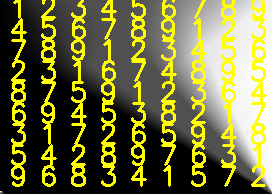

In [37]:
# import the necessary packages
# from Sudoku.pyimagesearch.sudoku import extract_digit
from Sudoku_OCR.pyimagesearch.sudoku import puzzle
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from sudoku import Sudoku
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-m", "--model", required=True,
# 	help="path to trained digit classifier")
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input Sudoku puzzle image")
# ap.add_argument("-d", "--debug", type=int, default=-1,
# 	help="whether or not we are visualizing each step of the pipeline")
# args = vars(ap.parse_args())

# load the digit classifier from disk

model_path = "/content/Model/chk.h5"
image_path = "/content/Sudoku_OCR/sudoku_puzzle.png"
debug = 0
print("[INFO] loading digit classifier...")
model = load_model(model_path)

# load the input image from disk and resize it
print("[INFO] processing image...")
image = cv2.imread(image_path)
image = imutils.resize(image, width=600)

# find the puzzle in the image and then
(puzzleImage, warped) = puzzle.find_puzzle(image, debug=debug > 0)

# initialize our 9x9 Sudoku board
board = np.zeros((9, 9), dtype="int")

# a Sudoku puzzle is a 9x9 grid (81 individual cells), so we can
# infer the location of each cell by dividing the warped image
# into a 9x9 grid
stepX = warped.shape[1] // 9
stepY = warped.shape[0] // 9

# initialize a list to store the (x, y)-coordinates of each cell
# location
cellLocs = []

# loop over the grid locations
for y in range(0, 9):
	# initialize the current list of cell locations
	row = []

	for x in range(0, 9):
		# compute the starting and ending (x, y)-coordinates of the
		# current cell
		startX = x * stepX
		startY = y * stepY
		endX = (x + 1) * stepX
		endY = (y + 1) * stepY

		# add the (x, y)-coordinates to our cell locations list
		row.append((startX, startY, endX, endY))

		# crop the cell from the warped transform image and then
		# extract the digit from the cell
		cell = warped[startY:endY, startX:endX]
		digit = puzzle.extract_digit(cell, debug=debug > 0)

		# verify that the digit is not empty
		if digit is not None:
			# resize the cell to 28x28 pixels and then prepare the
			# cell for classification
			roi = cv2.resize(digit, (28, 28))
			roi = roi.astype("float") / 255.0
			roi = img_to_array(roi)
			roi = np.expand_dims(roi, axis=0)

			# classify the digit and update the Sudoku board with the
			# prediction
			pred = model.predict(roi).argmax(axis=1)[0]
			board[y, x] = pred

	# add the row to our cell locations
	cellLocs.append(row)

# construct a Sudoku puzzle from the board
print("[INFO] OCR'd Sudoku board:")
puzzle = Sudoku(3, 3, board=board.tolist())
puzzle.show()

# solve the Sudoku puzzle
print("[INFO] solving Sudoku puzzle...")
solution = puzzle.solve()
solution.show_full()

# loop over the cell locations and board
for (cellRow, boardRow) in zip(cellLocs, solution.board):
	# loop over individual cell in the row
	for (box, digit) in zip(cellRow, boardRow):
		# unpack the cell coordinates
		startX, startY, endX, endY = box

		# compute the coordinates of where the digit will be drawn
		# on the output puzzle image
		textX = int((endX - startX) * 0.33)
		textY = int((endY - startY) * -0.2)
		textX += startX
		textY += endY

		# draw the result digit on the Sudoku puzzle image
		cv2.putText(puzzleImage, str(digit), (textX, textY),
			cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 255), 2)

# show the output image
cv2_imshow(puzzleImage)